# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [85]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [86]:
print(x.size())
print(y.size())

torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

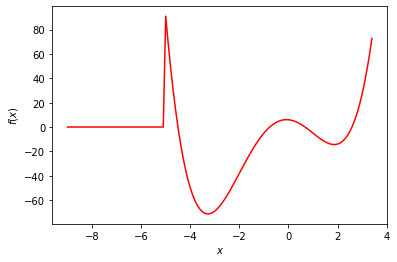

In [14]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [28]:
import math
import torch

class RangeDataset(torch.utils.data.Dataset):
  def __init__(self, x,y):
    #self.start = start
    #self.end = end
    self.x = x
    self.y = y

  def __len__(self):
    return x.shape[0]

  def __getitem__(self, index):
    value = x[index]
    #assert value < self.end
    return (x[index],y[index])

In [31]:
dataset = RangeDataset(x,y)
data_loader = torch.utils.data.DataLoader(
    dataset, 
    batch_size=N, 
    shuffle=True,  # set to True to have the data reshuffled at every epoch
#    num_workers=1, # how many subprocesses to use for data loading
    drop_last=True # set to True to drop the last incomplete batch, if the dataset size is not divisible by the batch size.
  )

for i, batch in enumerate(data_loader):
  print(i, batch)

0 [tensor([[-6.1000],
        [-5.1000],
        [-4.5000],
        [-5.0000],
        [-8.4000],
        [-3.8000],
        [-3.3000],
        [-7.5000],
        [ 0.9000],
        [ 1.1000],
        [-5.3000],
        [ 0.5000],
        [-4.6000],
        [ 1.4000],
        [-0.9000],
        [ 1.5000],
        [ 3.0000],
        [ 3.4000],
        [ 2.9000],
        [-8.8000],
        [ 3.2000],
        [-1.2000],
        [-4.3000],
        [-0.1000],
        [-5.2000],
        [ 2.3000],
        [-8.5000],
        [-8.7000],
        [-1.7000],
        [-0.2000],
        [ 1.0000],
        [-4.9000],
        [-1.6000],
        [-0.3000],
        [-8.9000],
        [ 1.2000],
        [-2.0000],
        [-2.5000],
        [-4.7000],
        [-0.7000],
        [-7.1000],
        [-0.5000],
        [-6.6000],
        [-8.0000],
        [ 2.5000],
        [-2.3000],
        [-0.4000],
        [-6.7000],
        [-4.8000],
        [-5.4000],
        [-6.9000],
        [ 0.3000],
        [

In [80]:
# Complete this cell: model and training

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()
    


In [89]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [90]:
Niter = 15000
saveLoss=np.zeros(Niter)
for epoch in range(Niter):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # COMPLETE THE CELL FROM HERE
        optimizer.zero_grad() # nullify all the gradients of the parameters (weights)
        output = net.forward(inputs) 
        loss = criterion(output, labels) # tensor that is a function of parameters => we have a computation graph
        loss.backward() # loss is the root node of the tree, input are the leafs : auto differentiation of the computational graph
        optimizer.step() # optimizer step apply to net.parameters() : it uses the gradiant of all parameters calculated by the
    if epoch % 100 == 0 : 
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))
    saveLoss[epoch] = loss.item()
print('Finished Training')

[1,     1] loss: 95.575
[101,     1] loss: 96.879
[201,     1] loss: 95.720
[301,     1] loss: 95.644
[401,     1] loss: 95.626
[501,     1] loss: 95.617
[601,     1] loss: 95.610
[701,     1] loss: 95.606
[801,     1] loss: 95.603
[901,     1] loss: 95.601
[1001,     1] loss: 95.600
[1101,     1] loss: 95.599
[1201,     1] loss: 95.598
[1301,     1] loss: 95.598
[1401,     1] loss: 95.597
[1501,     1] loss: 95.597
[1601,     1] loss: 95.597
[1701,     1] loss: 95.596
[1801,     1] loss: 95.596
[1901,     1] loss: 95.640
[2001,     1] loss: 95.703
[2101,     1] loss: 95.594
[2201,     1] loss: 95.593
[2301,     1] loss: 95.586
[2401,     1] loss: 95.584
[2501,     1] loss: 95.685
[2601,     1] loss: 95.582
[2701,     1] loss: 95.595
[2801,     1] loss: 95.598
[2901,     1] loss: 95.590
[3001,     1] loss: 95.586
[3101,     1] loss: 100.778
[3201,     1] loss: 95.582
[3301,     1] loss: 93.954
[3401,     1] loss: 82.403
[3501,     1] loss: 61.541
[3601,     1] loss: 47.465
[3701,     1

Plot the training error as a function of the epoch

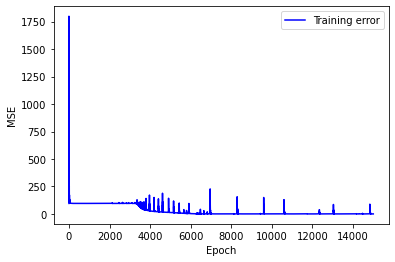

In [91]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

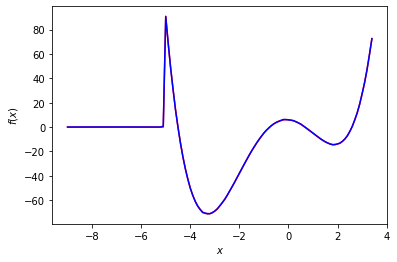

In [92]:
# Complete this cell
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(),net(x).detach().numpy(),'b-',label='NN function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

How many parameters?

In [68]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [69]:
print(net.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(net)))

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=1, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [71]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[ 1.1716],
        [ 1.0106],
        [ 0.9268],
        [ 1.3551],
        [-0.1736],
        [ 0.3746],
        [-0.9988],
        [ 0.7999],
        [ 0.8793],
        [-0.0365],
        [-0.0808],
        [ 1.2880],
        [ 1.4929],
        [ 0.3914],
        [-1.0987],
        [ 0.4092],
        [ 0.5387],
        [-0.6301],
        [-0.2966],
        [-0.6407],
        [-0.5775],
        [-1.2428],
        [ 0.3708],
        [ 1.3201],
        [ 1.3883],
        [ 0.7427],
        [-1.1085],
        [-0.1270],
        [ 0.5612],
        [ 1.3973],
        [ 0.3661],
        [ 0.4253],
        [-0.0567],
        [ 0.3850],
        [ 1.5294],
        [ 0.5384],
        [-0.7324],
        [ 0.6483],
        [-0.4762],
        [-0.9915]], requires_grad=True)
Parameter containing:
tensor([-1.3609e+00, -5.8499e-01, -1.5019e+00, -9.4388e-01,  8.9643e-01,
         1.7393e+00,  1.2262e+00, -1.5218e+00, -1.1304e+00,  1.3136e+00,
         6.9783e-01, -3.1242e

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [93]:
# Complete this cell: model and training

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc4 = nn.Linear(100,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc4(x)
        return x


net = Net()



In [94]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [96]:
Niter = 15000
saveLoss=np.zeros(Niter)
for epoch in range(Niter):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # COMPLETE THE CELL FROM HERE
        optimizer.zero_grad() # nullify all the gradients of the parameters (weights)
        output = net.forward(inputs) 
        loss = criterion(output, labels) # tensor that is a function of parameters => we have a computation graph
        loss.backward() # loss is the root node of the tree, input are the leafs : auto differentiation of the computational graph
        optimizer.step() # optimizer step apply to net.parameters() : it uses the gradiant of all parameters calculated by the
    if epoch % 100 == 0 : 
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))
    saveLoss[epoch] = loss.item()
print('Finished Training')

[1,     1] loss: 96.213
[101,     1] loss: 96.128
[201,     1] loss: 96.083
[301,     1] loss: 96.078
[401,     1] loss: 96.039
[501,     1] loss: 96.025
[601,     1] loss: 95.979
[701,     1] loss: 95.974
[801,     1] loss: 95.970
[901,     1] loss: 95.943
[1001,     1] loss: 95.934
[1101,     1] loss: 95.921
[1201,     1] loss: 95.890
[1301,     1] loss: 95.892
[1401,     1] loss: 95.898
[1501,     1] loss: 95.873
[1601,     1] loss: 95.861
[1701,     1] loss: 95.859
[1801,     1] loss: 95.927
[1901,     1] loss: 95.871
[2001,     1] loss: 95.853
[2101,     1] loss: 95.848
[2201,     1] loss: 95.825
[2301,     1] loss: 95.875
[2401,     1] loss: 95.818
[2501,     1] loss: 95.820
[2601,     1] loss: 95.812
[2701,     1] loss: 95.808
[2801,     1] loss: 95.796
[2901,     1] loss: 95.811
[3001,     1] loss: 96.160
[3101,     1] loss: 95.819
[3201,     1] loss: 95.843
[3301,     1] loss: 95.782
[3401,     1] loss: 95.781
[3501,     1] loss: 95.778
[3601,     1] loss: 95.775
[3701,     1]

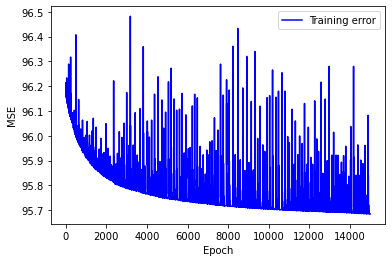

In [97]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

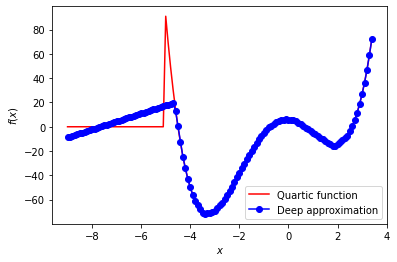

In [98]:
y_pred = net(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [99]:
print("\nTotal number of parameters {}\n".format(count_parameters(net)))


Total number of parameters 301

